<a href="https://colab.research.google.com/github/anjalikokare/MLP-lectures/blob/main/week2_mlp_2_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Outliers**

* **an outlier is a data point significantly differs from the other observations in the dataset**

 **what causes outlier in a dataset?**

* variability in measurement
* Data entry errors
* Novel or Rate Phenomena

**Inspecting Outliers**
* Manual inspection
* Box plots
* distributions


# **Describe Method**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = [
    {'name': 'anjali', 'age':18},
    {'name': 'payal', 'age':16},
    {'name': 'pooja', 'age':20},
    {'name': 'nikita', 'age':19}
]

In [6]:
df = pd.DataFrame(data)
print(df)

     name  age
0  anjali   18
1   payal   16
2   pooja   20
3  nikita   19


In [7]:
df.describe()

,age
count,4.000000
mean,18.250000
std,1.707825
min,16.000000
25%,17.500000
50%,18.500000
75%,19.250000
max,20.000000


# **Boxplots**

{'whiskers': [<matplotlib.lines.Line2D at 0x7cd92d840170>,
 'caps': [<matplotlib.lines.Line2D at 0x7cd92d840800>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cd92da2b7a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cd92d840e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cd92d841160>],
 'means': []}

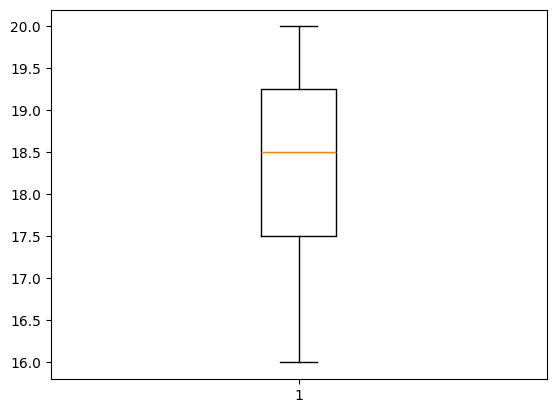

In [9]:
plt.boxplot(df['age'])

# **Distribution**

<Axes: xlabel='age', ylabel='Count'>

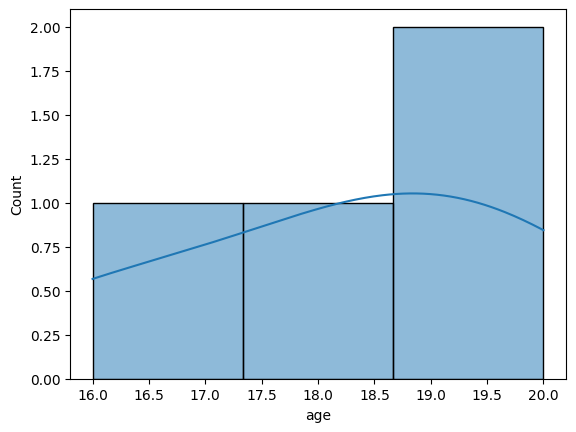

In [13]:
sns.histplot(df['age'], kde = True)

# **Scatter Plots**

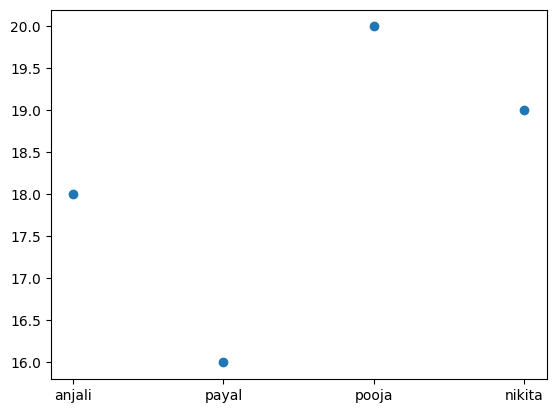

In [16]:
plt.scatter(df['name'],df['age'])

# **Methods to identify Outliers**
* **InterQuartile Range(IQR)**
* **Z-Score**
* **Isolation Forest**
* **Local Outlier Factor**


# **InterQuartile Range(IQR)**

* difference between Q3 and Q1 is called as the IQR
* points below [Q1 - (1.5*IQR)] and pointes above [Q3 + (1.5*IQR)] are considers as outliers

In [23]:
from sklearn.datasets import load_wine
data = load_wine()

In [25]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [26]:
df[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
data = [60,74,78,96,45,86,78,63,56,86,74]


In [27]:
data_iqr = df['magnesium']
iqr = data_iqr.quantile(0.75) - data_iqr.quantile(0.25)
lower_bound = data_iqr.quantile(0.25) - 1.5 * iqr
upper_bound = data_iqr.quantile(0.75) + 1.5 * iqr

data_iqr[(data_iqr > upper_bound) | (data_iqr < lower_bound)].shape[0]

4

{'whiskers': [<matplotlib.lines.Line2D at 0x7cd91e416300>,
 'caps': [<matplotlib.lines.Line2D at 0x7cd91e416930>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cd91e4249b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cd91e416bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cd91e416f00>],
 'means': []}

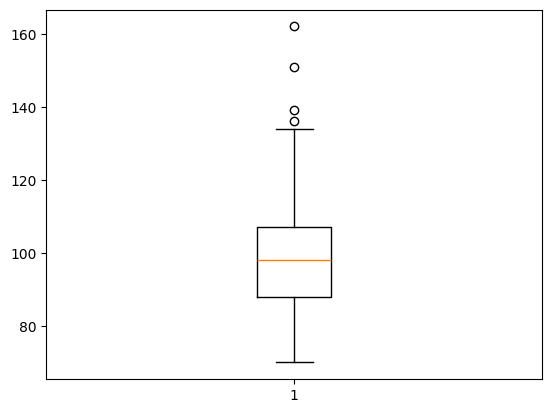

In [30]:
# plt.boxplot(df['magnesium'])
plt.boxplot(data_iqr)

# **Z-Score method**

* identification of outliers by measuring how many standard deviation(σ) , a data point is away from the mean(μ)
assumpltion of the dataset beinng normal
* Calculate μ and σ
* calculate the z-score

$$Z-Score(x_i) = \frac{x_i - μ}{σ}$$

* the data point with Z-score beyond +-3 are usually considered outliers

# **Strategies to handle Outliers**

* 1. **Remove** : Quick Analysis, Large amount of data withut outliers, outliers from data entry errors

* 2. Replace : cap the values, impute using median

* 3. Transform : use of Log-Transform on the entire dataset